In [1]:
import pandas as pd
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import scikitplot as skplt

In [8]:
data = pd.read_excel("D:\\Ayesha\\IBA Data Science\\Semester 3\\ML II\\Data_Cortex_Nuclear.xls")
data.head(3)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m


# DATA PREPROCESSING AND ENCODING 

In [9]:
#helper functions for data processing

def encoding(df):
    
    code = {'Control':1,
            'Ts65Dn':0,
            'Memantine':1,
            'Saline':0,
            'C/S':0,
            'S/C':1,
            'c-CS-m':0,
            'c-SC-m':1,
            'c-CS-s':2,
            'c-SC-s':3,
            't-CS-m':4,
            't-SC-m':5,
            't-CS-s':6,
            't-SC-s':7,
           }
    for col in df.select_dtypes('object'):
        df.loc[:,col]=df[col].map(code)
        
    return df

def imputation(df):
    
    #df = df.dropna(axis=0)
    df = df.fillna(df.mean())
    
    return df

def feature_engineering(df):
    useless_columns = ['MouseID']
    for feature in useless_columns:
        if feature in df:
            df = df.drop(feature,axis=1)
    return df

def standard_scale(data):
    
    """ This function is used to standardize the data frame """
    
    df_scaled=pd.DataFrame(StandardScaler().fit_transform(data.iloc[:,:-1]),columns=list(data.columns[:-1]))# Standardize the feature
    data=pd.concat((df_scaled,data["class"]),axis=1) #Concat with label
    return data
    
        

In [10]:
def preprocessing(df):
    df = encoding(df)
    df = feature_engineering(df)
    df = imputation(df)
    df= standard_scale(df)
    
    X = df.drop('class',axis=1)
    y = df['class'].astype(int)
      
    return df,X,y

In [11]:
df=data.copy() #making copy of oringnal data and apply data preprocessing functions on it 
df,X,y = preprocessing(df)
df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,0.312711,0.517934,2.253669,1.497362,2.304365,-0.345019,-0.158601,-0.899902,0.604115,0.691475,...,-0.987371,-0.285744,-1.011615,-1.416624,-1.607891,1.065901,0.945905,0.945905,-1.028175,0
1,0.356798,0.286501,1.880279,1.420009,1.976769,-0.518126,-0.334523,-0.963018,0.442658,0.359831,...,-1.162114,-0.067645,-1.063458,-1.325218,-1.546844,1.280291,0.945905,0.945905,-1.028175,0
2,0.334966,0.450465,2.012928,1.124860,1.909149,-0.581298,-0.226891,-0.969835,0.543335,0.284600,...,-1.079366,-0.155059,-1.065130,-1.373257,-1.623595,1.857038,0.945905,0.945905,-1.028175,0
3,0.065474,-0.000103,0.802123,0.489481,1.219245,-0.247424,-0.199461,-1.071196,-0.171236,0.357061,...,-0.860192,-0.818989,-0.723367,-0.984718,-1.218364,1.144490,0.945905,0.945905,-1.028175,0
4,0.036682,0.001305,0.805692,0.197652,0.939202,-0.482759,-0.304516,-1.085341,-0.627671,0.162107,...,-0.884881,-0.179502,-0.943378,-1.181435,-1.187585,1.583530,0.945905,0.945905,-1.028175,0


In [12]:
X=df.drop('class',axis=1)
Y=df['class']

In [21]:
def validationmetrics(model, testX, testY, verbose=True):  
    global predictions
    
    predictions = model.predict(testX)
    
    if model.__class__.__module__.startswith('lightgbm'):
        for i in range(0, predictions.shape[0]):
            predictions[i]= 1 if predictions[i] >= 0.5 else 0
    
    #Accuracy
    accuracy = accuracy_score(testY, predictions)*100
    
    result1 = classification_report(testY, predictions)
    print("Classification Report:",)
    print (result1)
    


    if verbose:
        print("Prediction Vector: \n", predictions)
        print("\n Accuracy: \n", accuracy)
    
        #confusion Matrix
        print("\n Confusion Matrix: \n", confusion_matrix(testY, predictions,labels=[0,1,2,3,4,5,6,7]))
    
    res_map = {
                "accuracy": accuracy,
                "model_obj": model
              }
    
    return res_map

In [22]:
def LogReg(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf  = LogisticRegression()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def SVM(trainX, testX, trainY, testY, svmtype="SVC", verbose=True, clf=None):
    # for one vs all
    if not clf:
        if svmtype == "Linear":
            clf = svm.LinearSVC()
        else:
            clf = svm.SVC()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def RandomForest(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf  = RandomForestClassifier()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def XgBoost(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = XGBClassifier(random_state=1,learning_rate=0.01)
    clf.fit(trainX,trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

# Random Forest Selection

In [19]:
model= RandomForestClassifier(n_estimators=100,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

Treatment     0.117243
Genotype      0.113524
SOD1_N        0.050694
Behavior      0.045989
pERK_N        0.030286
                ...   
Bcatenin_N    0.003066
pCFOS_N       0.002771
CREB_N        0.002436
EGR1_N        0.002360
MEK_N         0.001967
Length: 80, dtype: float64

In [23]:
import matplotlib
import matplotlib.pyplot as plt

def select_features(X_train, y_train, X_test,n):
    # configure to select a subset of features
    fs = SelectFromModel(RandomForestClassifier(n_estimators=100),threshold=-np.inf, max_features=n)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    selected_feat= X_train.columns[(fs.get_support())]
    print(selected_feat)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# feature selection
for n in range(5,25,5):
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test,n)
    # fit the model
    print ("Logistic Regression From Random Forest Selection")
    LogReg(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    print ("SVM From Random Forest Selection")
    SVM(X_train_fs, X_test_fs, y_train, y_test, svmtype="SVC", verbose=True, clf=None)
    print ("RM From Random Forest Selection")
    RandomForest(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    print ("Xgboost From Random Forest Selection")
    XgBoost(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    
    

Index(['SOD1_N', 'pPKCG_N', 'Genotype', 'Treatment', 'Behavior'], dtype='object')
Logistic Regression From Random Forest Selection
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        46

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357

Prediction Vector: 
 [2 5 3 0 4 0 0 1 0 3 6 1 3 5 5 3 6 4 1 0 4 1 5 3 3 0 6 2 5 2 1 5 7 0 4 0 5
 0 2 7 1 4 5 0 1 1 5 2 0 5 1 7 3 2 1 4 6 3 2 6 3 0 0 1 3 7 1 1 6 0 2 0 6 0
 0 0 0 4 2 5 1 4 0 7 4 0

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:43:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        47
           6       0.97      1.00      0.98        28
           7       1.00      0.98      0.99        46

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357

Prediction Vect

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      0.96      0.98        50
           2       1.00      1.00      1.00        44
           3       0.93      1.00      0.97        42
           4       1.00      0.91      0.96        47
           5       0.98      1.00      0.99        47
           6       0.90      1.00      0.95        28
           7       0.98      0.96      0.97        46

    accuracy                           0.98       357
   macro avg       0.97      0.98      0.98       357
weighted avg       0.98      0.98      0.98       357

Prediction Vector: 
 [2 5 3 0 4 0 0 1 0 3 6 1 3 5 5 3 6 4 1 0 4 1 5 3 3 0 6 2 5 2 1 5 7 0 6 0 5
 0 2 3 1 4 5 0 1 1 5 2 0 5 1 7 3 2 1 4 6 3 2 6 3 0 0 1 3 7 1 1 6 0 2 0 6 0
 0 0 0 4 2 5 1 4 0 7 4 0 1 6 1 1 1 1 5 4 2 3 4 6 0 0 1 1 4 3 7 4 2 0 5 7 5
 3 7 7 1 3 2 3 7 5 1 7 7 0 1 5 3 1 6 4 3 5 6 4 1 5 5 4 2 7 1 4 7 5 2 2 4 6
 2 4 

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       1.00      0.98      0.99        50
           2       1.00      1.00      1.00        44
           3       0.91      1.00      0.95        42
           4       1.00      0.96      0.98        47
           5       0.98      1.00      0.99        47
           6       1.00      1.00      1.00        28
           7       0.98      0.91      0.94        46

    accuracy                           0.98       357
   macro avg       0.98      0.98      0.98       357
weighted avg       0.98      0.98      0.98       357

Prediction Vector: 
 [2 5 3 0 4 0 0 1 0 3 6 1 3 5 5 3 6 4 1 0 4 1 5 3 3 0 6 2 5 2 1 5 7 0 4 0 5
 0 2 3 1 4 5 0 1 1 5 2 0 5 1 7 3 2 1 4 6 3 2 6 3 0 0 1 3 7 1 1 6 0 2 0 6 0
 0 0 0 4 2 5 1 4 0 7 4 0 1 6 1 1 1 1 5 4 2 3 4 6 0 0 1 1 4 3 7 4 2 0 5 7 5
 3 7 7 1 3 2 3 7 5 1 7 7 0 1 5 3 1 6 4 3 5 6 4 1 5 5 4 2 7 1 4 7 5 2 2 4 6
 2 4 

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      0.98      0.99        50
           2       1.00      1.00      1.00        44
           3       0.93      1.00      0.97        42
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        28
           7       1.00      0.96      0.98        46

    accuracy                           0.99       357
   macro avg       0.99      0.99      0.99       357
weighted avg       0.99      0.99      0.99       357

Prediction Vector: 
 [2 5 3 0 4 0 0 1 0 3 6 1 3 5 5 3 6 4 1 0 4 1 5 3 3 0 6 2 5 2 1 5 7 0 4 0 5
 0 2 3 1 4 5 0 1 1 5 2 0 5 1 7 3 2 1 4 6 3 2 6 3 0 0 1 3 7 1 1 6 0 2 0 6 0
 0 0 0 4 2 5 1 4 0 7 4 0 1 6 1 1 1 1 5 4 2 3 4 6 0 0 1 1 4 3 7 4 2 0 5 7 5
 3 7 7 1 3 2 3 7 5 1 7 7 0 1 5 3 1 6 4 3 5 6 4 1 5 5 4 2 7 1 4 7 5 2 2 4 6
 2 4 

# Xgboost Selection

In [24]:
model= XGBClassifier(n_estimators=100,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:43:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


pMTOR_N       0.060030
H3AcK18_N     0.058091
BRAF_N        0.056664
Genotype      0.053601
Treatment     0.048841
                ...   
ELK_N         0.000000
ERK_N         0.000000
GSK3B_N       0.000000
JNK_N         0.000000
Bcatenin_N    0.000000
Length: 80, dtype: float32

In [25]:
def select_features(X_train, y_train, X_test,n):
    # configure to select a subset of features
    fs = SelectFromModel(XGBClassifier(n_estimators=100),threshold=-np.inf, max_features=n)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    selected_feat= X_train.columns[(fs.get_support())]
    print(selected_feat)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs



# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# feature selection
for n in range(5,25,5):
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test,n)
    # fit the model
    print ("Logistic Regression From XGboost Selection")
    LogReg(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    print ("SVM From XGboost Selection")
    SVM(X_train_fs, X_test_fs, y_train, y_test, svmtype="SVC", verbose=True, clf=None)
    print ("RM From XGboost Selection")
    RandomForest(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    print ("Xgboost From XGboost Selection")
    XgBoost(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
 

[17:43:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Index(['TRKA_N', 'pNUMB_N', 'TIAM1_N', 'pPKCG_N', 'Genotype'], dtype='object')


C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Logistic Regression From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.51      0.58        53
           1       0.57      0.82      0.67        50
           2       0.47      0.41      0.44        44
           3       0.85      0.79      0.81        42
           4       0.51      0.51      0.51        47
           5       0.83      0.85      0.84        47
           6       0.30      0.21      0.25        28
           7       0.77      0.89      0.83        46

    accuracy                           0.64       357
   macro avg       0.62      0.62      0.62       357
weighted avg       0.64      0.64      0.63       357

Prediction Vector: 
 [0 5 3 2 4 2 0 1 0 3 7 1 3 5 5 3 4 5 1 0 7 1 5 3 1 2 4 2 4 2 1 5 7 2 4 0 5
 2 1 7 1 6 5 0 1 1 4 1 2 5 3 7 1 2 1 4 7 3 2 4 3 2 0 3 2 7 1 1 4 0 1 2 4 0
 2 0 1 5 0 5 1 4 2 7 6 0 1 7 1 1 1 1 5 5 0 3 4 6 1 0 1 3 6 3 7 4 2 1 5 7 5
 3 7 7 1 3 0 3 7 5 1 7 7 1 1 5 3 1 4 

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79        53
           1       0.64      0.86      0.74        50
           2       0.82      0.70      0.76        44
           3       0.79      0.74      0.77        42
           4       0.73      0.79      0.76        47
           5       0.86      0.89      0.88        47
           6       0.56      0.50      0.53        28
           7       0.93      0.85      0.89        46

    accuracy                           0.77       357
   macro avg       0.77      0.76      0.76       357
weighted avg       0.78      0.77      0.77       357

Prediction Vector: 
 [2 5 3 0 4 0 0 1 0 3 4 1 3 5 5 3 6 4 1 0 4 1 5 3 1 0 6 2 4 2 1 5 7 0 4 0 5
 0 2 7 1 6 5 0 3 1 5 1 0 5 1 7 1 2 1 4 6 3 0 4 3 2 0 1 2 6 1 1 7 0 1 0 4 0
 0 0 1 6 2 5 1 4 0 7 4 2 1 4 1 3 1 3 5 5 0 1 4 5 0 0 1 3 4 1 7 4 2 1 5 7 5
 3 3 7 1 3 2 3 7 5 1 7 7 0 1 4 3 1 6 4 3 5 6 4 1 5 5 4 2 6 3 5 7 5 1 2 4 6
 2 4 

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['pRSK_N', 'TRKA_N', 'P38_N', 'AMPKA_N', 'pNUMB_N', 'TIAM1_N', 'pPKCG_N',
       'Genotype', 'Treatment', 'Behavior'],
      dtype='object')
Logistic Regression From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        46

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357

Prediction Vector: 
 [2 5 3 0 4 0 0 1 0 3 6 1 3 5 5 3 6 4 1 0 4 1 5 3 3 0 6 2 5 2 1 5 7 0 4 0 5
 0 2 7 1 4 5 0 1 1 5 2 0 5 1 7 3 2 1 4 6

C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        46

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357

Prediction Vector: 
 [2 5 3 0 4 0 0 1 0 3 6 1 3 5 5 3 6 4 1 0 4 1 5 3 3 0 6 2 5 2 1 5 7 0 4 0 5
 0 2 7 1 4 5 0 1 1 5 2 0 5 1 7 3 2 1 4 6 3 2 6 3 0 0 1 3 7 1 1 6 0 2 0 6 0
 0 0 0 4 2 5 1 4 0 7 4 0 1 6 1 1 1 1 5 4 2 3 4 6 0 0 1 1 4 3 7 4 2 0 5 7 5
 3 7 7 1 3 2 3 7 5 1 7 7 0 1 5 3 1 6 4 3 5 6 4 1 5 5 4 2 7 1 4 7 5 2 2 4 6
 2 4 

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        47
           6       1.00      0.93      0.96        28
           7       0.96      1.00      0.98        46

    accuracy                           0.99       357
   macro avg       0.99      0.99      0.99       357
weighted avg       0.99      0.99      0.99       357

Prediction Vector: 
 [2 5 3 0 4 0 0 1 0 3 6 1 3 5 5 3 6 4 1 0 4 1 5 3 3 0 6 2 5 2 1 5 7 0 4 0 5
 0 2 7 1 4 5 0 1 1 5 2 0 5 1 7 3 2 1 4 6 3 2 6 3 0 0 1 3 7 1 1 6 0 2 0 6 0
 0 0 0 4 2 5 1 4 0 7 4 0 1 6 1 1 1 1 5 4 2 3 4 6 0 0 1 1 4 3 7 4 2 0 5 7 5
 3 7 7 1 3 2 3 7 5 1 7 7 0 1 5 3 1 6 4 3 5 6 4 1 5 5 4 2 7 1 4 7 5 2 2 4 6
 2 4 

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['pPKCAB_N', 'pRSK_N', 'BRAF_N', 'TRKA_N', 'P38_N', 'pMTOR_N', 'DSCR1_N',
       'AMPKA_N', 'pNUMB_N', 'TIAM1_N', 'pPKCG_N', 'IL1B_N', 'Genotype',
       'Treatment', 'Behavior'],
      dtype='object')
Logistic Regression From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        46

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357

Prediction Vector: 
 [2 5 3 0 4 0 0 1 0 3 6 1 3 5 5 3 6 4 1 0 4 1 5 3 3 0 6

C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        46

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357

Prediction Vector: 
 [2 5 3 0 4 0 0 1 0 3 6 1 3 5 5 3 6 4 1 0 4 1 5 3 3 0 6 2 5 2 1 5 7 0 4 0 5
 0 2 7 1 4 5 0 1 1 5 2 0 5 1 7 3 2 1 4 6 3 2 6 3 0 0 1 3 7 1 1 6 0 2 0 6 0
 0 0 0 4 2 5 1 4 0 7 4 0 1 6 1 1 1 1 5 4 2 3 4 6 0 0 1 1 4 3 7 4 2 0 5 7 5
 3 7 7 1 3 2 3 7 5 1 7 7 0 1 5 3 1 6 4 3 5 6 4 1 5 5 4 2 7 1 4 7 5 2 2 4 6
 2 4 

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       0.98      1.00      0.99        44
           3       1.00      0.98      0.99        42
           4       0.98      0.98      0.98        47
           5       0.96      0.98      0.97        47
           6       0.96      0.89      0.93        28
           7       0.96      0.98      0.97        46

    accuracy                           0.98       357
   macro avg       0.98      0.98      0.98       357
weighted avg       0.98      0.98      0.98       357

Prediction Vector: 
 [2 5 3 0 4 0 0 1 0 3 6 1 3 5 5 3 6 4 1 0 4 1 5 3 3 0 6 2 5 2 1 5 7 0 5 0 5
 0 2 7 1 4 5 0 1 1 5 2 0 5 1 7 3 2 1 4 6 3 2 6 3 0 0 1 3 7 1 1 6 0 2 0 6 0
 0 0 0 4 2 5 1 4 0 7 4 0 1 6 1 1 1 1 5 4 2 3 4 5 0 0 1 1 4 3 7 4 2 0 5 6 5
 3 7 7 1 3 2 3 7 5 1 7 7 0 1 5 3 1 6 4 3 5 6 4 1 5 5 4 2 7 1 4 7 5 2 2 4 6
 2 4 

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Index(['pPKCAB_N', 'pRSK_N', 'BRAF_N', 'TRKA_N', 'SOD1_N', 'P38_N', 'pMTOR_N',
       'DSCR1_N', 'AMPKA_N', 'pNUMB_N', 'TIAM1_N', 'pP70S6_N', 'pPKCG_N',
       'ARC_N', 'IL1B_N', 'H3AcK18_N', 'CaNA_N', 'Genotype', 'Treatment',
       'Behavior'],
      dtype='object')
Logistic Regression From XGboost Selection
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        46

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357

Prediction Vec

C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        46

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357

Prediction Vector: 
 [2 5 3 0 4 0 0 1 0 3 6 1 3 5 5 3 6 4 1 0 4 1 5 3 3 0 6 2 5 2 1 5 7 0 4 0 5
 0 2 7 1 4 5 0 1 1 5 2 0 5 1 7 3 2 1 4 6 3 2 6 3 0 0 1 3 7 1 1 6 0 2 0 6 0
 0 0 0 4 2 5 1 4 0 7 4 0 1 6 1 1 1 1 5 4 2 3 4 6 0 0 1 1 4 3 7 4 2 0 5 7 5
 3 7 7 1 3 2 3 7 5 1 7 7 0 1 5 3 1 6 4 3 5 6 4 1 5 5 4 2 7 1 4 7 5 2 2 4 6
 2 4 

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.98      1.00      0.99        50
           2       0.98      1.00      0.99        44
           3       0.95      0.98      0.96        42
           4       0.96      1.00      0.98        47
           5       0.96      0.96      0.96        47
           6       1.00      0.89      0.94        28
           7       0.95      0.91      0.93        46

    accuracy                           0.97       357
   macro avg       0.97      0.97      0.97       357
weighted avg       0.97      0.97      0.97       357

Prediction Vector: 
 [2 5 3 0 4 0 0 1 0 3 6 1 3 5 5 3 6 4 1 0 4 1 5 3 3 0 6 2 5 2 1 5 7 0 4 0 5
 0 2 3 1 4 5 0 1 1 5 2 0 5 1 7 3 2 1 4 6 3 2 6 3 0 0 1 3 7 1 1 6 0 2 0 6 0
 0 0 0 4 2 1 1 4 0 7 4 0 1 6 1 1 1 1 5 4 2 3 4 6 0 0 1 1 4 3 7 4 2 0 5 7 5
 3 5 7 1 3 2 3 7 5 1 7 7 0 1 5 3 1 6 4 3 5 6 4 1 5 5 4 2 7 1 4 7 5 2 2 4 4
 2 4 

# RFE Selection

In [26]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [27]:
def select_features(X_train, y_train, X_test,n):
    # configure to select a subset of features
    fs = RFE(estimator = DecisionTreeClassifier(), n_features_to_select = n)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    selected_feat= X_train.columns[(fs.get_support())]
    print(selected_feat)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# feature selection
for n in range(5,25,5):
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test,n)
    # fit the model
    print ("Logistic Regression From RFE Selection")
    LogReg(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    print ("SVM From RFE Selection")
    SVM(X_train_fs, X_test_fs, y_train, y_test, svmtype="SVC", verbose=True, clf=None)
    print ("RM From RFE Selection")
    RandomForest(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    print ("Xgboost From RFE Selection")
    XgBoost(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)

 

Index(['H3MeK4_N', 'CaNA_N', 'Genotype', 'Treatment', 'Behavior'], dtype='object')
Logistic Regression From RFE Selection
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        46

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357

Prediction Vector: 
 [2 5 3 0 4 0 0 1 0 3 6 1 3 5 5 3 6 4 1 0 4 1 5 3 3 0 6 2 5 2 1 5 7 0 4 0 5
 0 2 7 1 4 5 0 1 1 5 2 0 5 1 7 3 2 1 4 6 3 2 6 3 0 0 1 3 7 1 1 6 0 2 0 6 0
 0 0 0 4 2 5 1 4 0 7 4 0 1 6 1 1 

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.98      1.00      0.99        50
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        47
           5       1.00      0.98      0.99        47
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        46

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357

Prediction Vector: 
 [2 5 3 0 4 0 0 1 0 3 6 1 3 5 5 3 6 4 1 0 4 1 1 3 3 0 6 2 5 2 1 5 7 0 4 0 5
 0 2 7 1 4 5 0 1 1 5 2 0 5 1 7 3 2 1 4 6 3 2 6 3 0 0 1 3 7 1 1 6 0 2 0 6 0
 0 0 0 4 2 5 1 4 0 7 4 0 1 6 1 1 1 1 5 4 2 3 4 6 0 0 1 1 4 3 7 4 2 0 5 7 5
 3 7 7 1 3 2 3 7 5 1 7 7 0 1 5 3 1 6 4 3 5 6 4 1 5 5 4 2 7 1 4 7 5 2 2 4 6
 2 4 

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        46

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357

Prediction Vector: 
 [2 5 3 0 4 0 0 1 0 3 6 1 3 5 5 3 6 4 1 0 4 1 5 3 3 0 6 2 5 2 1 5 7 0 4 0 5
 0 2 7 1 4 5 0 1 1 5 2 0 5 1 7 3 2 1 4 6 3 2 6 3 0 0 1 3 7 1 1 6 0 2 0 6 0
 0 0 0 4 2 5 1 4 0 7 4 0 1 6 1 1 1 1 5 4 2 3 4 6 0 0 1 1 4 3 7 4 2 0 5 7 5
 3 7 7 1 3 2 3 7 5 1 7 7 0 1 5 3 1 6 4 3 5 6 4 1 5 5 4 2 7 1 4 7 5 2 2 4 6
 2 4 

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        46

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357

Prediction Vector: 
 [2 5 3 0 4 0 0 1 0 3 6 1 3 5 5 3 6 4 1 0 4 1 5 3 3 0 6 2 5 2 1 5 7 0 4 0 5
 0 2 7 1 4 5 0 1 1 5 2 0 5 1 7 3 2 1 4 6 3 2 6 3 0 0 1 3 7 1 1 6 0 2 0 6 0
 0 0 0 4 2 5 1 4 0 7 4 0 1 6 1 1 1 1 5 4 2 3 4 6 0 0 1 1 4 3 7 4 2 0 5 7 5
 3 7 7 1 3 2 3 7 5 1 7 7 0 1 5 3 1 6 4 3 5 6 4 1 5 5 4 2 7 1 4 7 5 2 2 4 6
 2 4 

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.98      1.00      0.99        50
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        47
           5       1.00      0.98      0.99        47
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        46

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357

Prediction Vector: 
 [2 5 3 0 4 0 0 1 0 3 6 1 3 5 5 3 6 4 1 0 4 1 5 3 3 0 6 2 5 2 1 5 7 0 4 0 5
 0 2 7 1 4 5 0 1 1 5 2 0 5 1 7 3 2 1 4 6 3 2 6 3 0 0 1 3 7 1 1 6 0 2 0 6 0
 0 0 0 4 2 5 1 4 0 7 4 0 1 6 1 1 1 1 5 4 2 3 4 6 0 0 1 1 4 3 7 4 2 0 5 7 5
 3 7 7 1 3 2 3 7 5 1 7 7 0 1 5 3 1 6 4 3 5 6 4 1 5 5 4 2 7 1 4 7 5 2 2 4 6
 2 4 

# Lasso Selection

In [28]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

In [29]:
def select_features(X_train, y_train, X_test,n):
    # configure to select a subset of features
    # Use L1 penalty
    estimator = LassoCV(cv=5, normalize = True)
    fs = SelectFromModel(estimator,threshold=-np.inf, max_features=n)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    selected_feat= X_train.columns[(fs.get_support())]
    print(selected_feat)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# feature selection
for n in range(5,25,5):
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test,n)
    # fit the model
    print ("Logistic Regression From L1 Based Feature Selection")
    LogReg(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    print ("SVM From L1 Based Feature Selection")
    SVM(X_train_fs, X_test_fs, y_train, y_test, svmtype="SVC", verbose=True, clf=None)
    print ("RM From L1 Based Feature Selection")
    RandomForest(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    print ("Xgboost From L1 Based Feature Selection")
    XgBoost(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)


C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Index(['DYRK1A_N', 'ITSN1_N', 'Genotype', 'Treatment', 'Behavior'], dtype='object')
Logistic Regression From L1 Based Feature Selection
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        46

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357

Prediction Vector: 
 [2 5 3 0 4 0 0 1 0 3 6 1 3 5 5 3 6 4 1 0 4 1 5 3 3 0 6 2 5 2 1 5 7 0 4 0 5
 0 2 7 1 4 5 0 1 1 5 2 0 5 1 7 3 2 1 4 6 3 2 6 3 0 0 1 3 7 1 1 6 0 2 0 6 0
 0 0 0 4 2 5 1 4 0 

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.96      0.98      0.97        50
           2       1.00      1.00      1.00        44
           3       0.98      1.00      0.99        42
           4       1.00      0.96      0.98        47
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        46

    accuracy                           0.99       357
   macro avg       0.99      0.99      0.99       357
weighted avg       0.99      0.99      0.99       357

Prediction Vector: 
 [2 5 3 0 4 0 0 1 0 3 6 1 3 5 5 3 6 4 1 0 4 1 5 3 3 0 6 2 5 2 1 5 7 0 1 0 5
 0 2 7 1 4 5 0 1 1 5 2 0 5 3 7 3 2 1 4 6 3 2 6 3 0 0 1 3 7 1 1 6 0 2 0 6 0
 0 0 0 4 2 5 1 4 0 7 4 0 1 6 1 1 1 1 5 4 2 3 4 6 0 0 1 1 4 3 7 4 2 0 5 7 5
 3 7 7 1 3 2 3 7 5 1 7 7 0 1 5 3 1 6 4 3 5 6 4 1 5 5 4 2 7 1 4 7 5 2 2 4 6
 2 4 

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(



 Confusion Matrix: 
 [[53  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0]
 [ 0  0  0 42  0  0  0  0]
 [ 0  0  0  0 47  0  0  0]
 [ 0  0  0  0  0 47  0  0]
 [ 0  0  0  0  0  0 28  0]
 [ 0  0  1  0  0  0  0 45]]
RM From L1 Based Feature Selection
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        46

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357

Prediction Vector: 
 [2 5 3 0 4 0 0 1 0 3 6 1 3 5 5 

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      0.98      0.99        50
           2       1.00      1.00      1.00        44
           3       0.98      1.00      0.99        42
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        46

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357

Prediction Vector: 
 [2 5 3 0 4 0 0 1 0 3 6 1 3 5 5 3 6 4 1 0 4 1 5 3 3 0 6 2 5 2 1 5 7 0 4 0 5
 0 2 7 1 4 5 0 1 1 5 2 0 5 3 7 3 2 1 4 6 3 2 6 3 0 0 1 3 7 1 1 6 0 2 0 6 0
 0 0 0 4 2 5 1 4 0 7 4 0 1 6 1 1 1 1 5 4 2 3 4 6 0 0 1 1 4 3 7 4 2 0 5 7 5
 3 7 7 1 3 2 3 7 5 1 7 7 0 1 5 3 1 6 4 3 5 6 4 1 5 5 4 2 7 1 4 7 5 2 2 4 6
 2 4 

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       0.98      1.00      0.99        44
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        28
           7       1.00      0.98      0.99        46

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357

Prediction Vector: 
 [2 5 3 0 4 0 0 1 0 3 6 1 3 5 5 3 6 4 1 0 4 1 5 3 3 0 6 2 5 2 1 5 7 0 4 0 5
 0 2 7 1 4 5 0 1 1 5 2 0 5 1 7 3 2 1 4 6 3 2 6 3 0 0 1 3 7 1 1 6 0 2 0 6 0
 0 0 0 4 2 5 1 4 0 7 4 0 1 6 1 1 1 1 5 4 2 3 4 6 0 0 1 1 4 3 7 4 2 0 5 7 5
 3 7 7 1 3 2 3 7 5 1 7 7 0 1 5 3 1 6 4 3 5 6 4 1 5 5 4 2 7 1 4 7 5 2 2 4 6
 2 4 

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        42
           4       1.00      0.98      0.99        47
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        46

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357

Prediction Vector: 
 [2 5 3 0 4 0 0 1 0 3 6 1 3 5 5 3 6 4 1 0 4 1 5 3 3 0 6 2 5 2 1 5 7 0 4 0 5
 0 2 7 1 4 5 0 1 1 5 2 0 5 1 7 3 2 1 4 6 3 2 6 3 0 0 1 3 7 1 1 6 0 2 0 6 0
 0 0 0 4 2 5 1 4 0 7 4 0 1 6 1 1 1 1 5 4 2 3 4 6 0 0 1 1 4 3 7 4 2 0 5 7 5
 3 7 7 1 3 2 3 7 5 1 7 7 0 1 5 3 1 6 4 3 5 6 4 1 5 5 4 2 7 1 4 7 5 2 2 4 6
 2 4 

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(




 Accuracy: 
 100.0

 Confusion Matrix: 
 [[53  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0]
 [ 0  0  0 42  0  0  0  0]
 [ 0  0  0  0 47  0  0  0]
 [ 0  0  0  0  0 47  0  0]
 [ 0  0  0  0  0  0 28  0]
 [ 0  0  0  0  0  0  0 46]]
SVM From L1 Based Feature Selection
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       0.98      1.00      0.99        44
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        28
           7       1.00      0.98      0.99        46

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357

Prediction Vector: 
 [2 5 3 0 

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        46

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357

Prediction Vector: 
 [2 5 3 0 4 0 0 1 0 3 6 1 3 5 5 3 6 4 1 0 4 1 5 3 3 0 6 2 5 2 1 5 7 0 4 0 5
 0 2 7 1 4 5 0 1 1 5 2 0 5 1 7 3 2 1 4 6 3 2 6 3 0 0 1 3 7 1 1 6 0 2 0 6 0
 0 0 0 4 2 5 1 4 0 7 4 0 1 6 1 1 1 1 5 4 2 3 4 6 0 0 1 1 4 3 7 4 2 0 5 7 5
 3 7 7 1 3 2 3 7 5 1 7 7 0 1 5 3 1 6 4 3 5 6 4 1 5 5 4 2 7 1 4 7 5 2 2 4 6
 2 4 

# PCA

[2.46876729e-01 1.75223526e-01 9.72894173e-02 7.37966586e-02
 5.07545175e-02 4.39520936e-02 3.64207918e-02 2.99914110e-02
 2.36663750e-02 2.05569520e-02 1.70214793e-02 1.39979068e-02
 1.25589051e-02 1.06392519e-02 1.05776329e-02 9.11779878e-03
 8.95927534e-03 7.93386446e-03 6.30350095e-03 6.06581552e-03
 5.73952194e-03 5.50834549e-03 5.06887188e-03 5.00538714e-03
 4.67466426e-03 4.27139949e-03 4.02978949e-03 3.90257958e-03
 3.76580702e-03 3.36783978e-03 3.21336291e-03 3.01336687e-03
 2.87442401e-03 2.69637110e-03 2.45100376e-03 2.22191774e-03
 2.12279956e-03 2.09755227e-03 1.93547890e-03 1.84554421e-03
 1.81236728e-03 1.68702965e-03 1.60594165e-03 1.42397405e-03
 1.38894147e-03 1.33449052e-03 1.23530006e-03 1.16785030e-03
 1.14412743e-03 1.13361173e-03 9.87629664e-04 9.29960811e-04
 8.72917427e-04 8.08753072e-04 8.05639615e-04 7.77847004e-04
 7.19815492e-04 7.02656933e-04 6.70994780e-04 6.40843464e-04
 6.10856068e-04 5.38222187e-04 5.12591536e-04 5.00746088e-04
 4.73662793e-04 4.558277

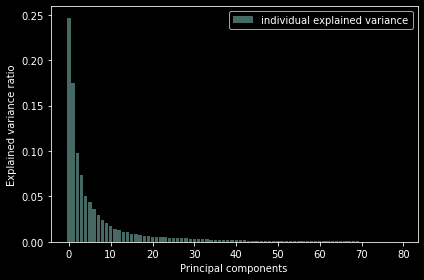

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

Explained Variance Ratio of  5  Components:
[0.24687673 0.17522353 0.09728942 0.07379666 0.05075452]


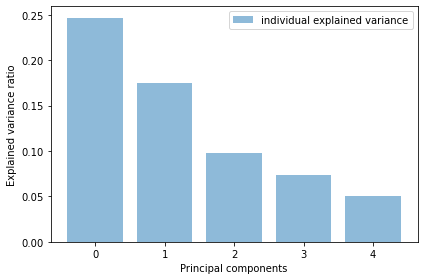

Logistic Regression From PCA


C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.60      0.57        53
           1       0.63      0.76      0.69        50
           2       0.41      0.34      0.37        44
           3       0.51      0.50      0.51        42
           4       0.57      0.53      0.55        47
           5       0.69      0.51      0.59        47
           6       0.42      0.46      0.44        28
           7       0.82      0.89      0.85        46

    accuracy                           0.59       357
   macro avg       0.57      0.58      0.57       357
weighted avg       0.58      0.59      0.58       357

Prediction Vector: 
 [2 5 3 7 2 0 0 1 7 3 4 1 5 1 5 1 6 4 1 0 4 1 5 3 3 0 4 2 1 0 1 5 6 0 6 0 1
 0 6 7 1 0 5 0 1 1 1 2 2 5 3 7 1 0 1 0 6 5 2 6 3 6 0 1 5 7 1 3 6 0 0 0 6 0
 2 0 0 2 0 3 1 4 0 7 2 2 1 7 1 1 3 1 3 4 2 1 0 6 0 0 1 1 4 3 7 6 4 4 5 7 1
 3 7 7 1 3 0 3 7 5 1 7 7 0 3 5 3 1 2 7 3 5 2 6 1 5 5 4 4 7 1 2 7 3 6 0 4 6
 6 4 

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.68      0.73        53
           1       0.71      0.70      0.71        50
           2       0.58      0.73      0.65        44
           3       0.54      0.67      0.60        42
           4       0.62      0.62      0.62        47
           5       0.51      0.43      0.47        47
           6       0.67      0.36      0.47        28
           7       0.63      0.74      0.68        46

    accuracy                           0.63       357
   macro avg       0.63      0.61      0.61       357
weighted avg       0.63      0.63      0.62       357

Prediction Vector: 
 [7 0 3 0 2 0 0 5 0 3 4 5 5 1 3 1 6 4 1 0 4 1 7 3 3 0 2 2 1 2 1 5 3 0 4 0 5
 0 2 3 5 4 5 0 1 1 1 2 0 7 3 7 4 0 1 4 4 3 2 4 3 7 0 1 5 7 1 3 6 0 2 0 4 0
 2 0 0 4 2 3 1 4 0 7 2 2 1 0 3 1 1 1 3 4 2 3 2 6 3 0 1 1 0 5 7 4 2 0 7 7 5
 3 7 7 1 3 2 3 7 1 1 7 7 0 5 5 3 1 2 2 3 5 0 4 1 7 5 4 4 7 3 4 7 3 2 7 4 6
 4 4 

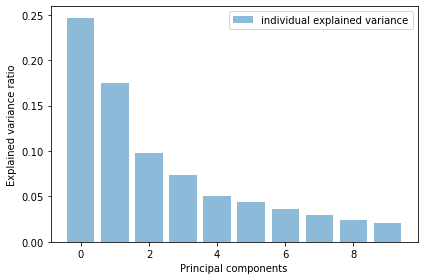

Logistic Regression From PCA
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        53
           1       0.94      0.98      0.96        50
           2       0.78      0.89      0.83        44
           3       1.00      1.00      1.00        42
           4       0.89      0.83      0.86        47
           5       0.98      0.94      0.96        47
           6       0.92      0.86      0.89        28
           7       1.00      1.00      1.00        46

    accuracy                           0.91       357
   macro avg       0.91      0.91      0.91       357
weighted avg       0.91      0.91      0.91       357

Prediction Vector: 
 [2 5 3 0 4 0 0 1 0 3 4 1 3 5 5 3 6 4 5 0 4 1 5 3 3 0 6 2 5 2 1 5 7 0 4 0 5
 0 2 7 1 0 5 0 1 1 5 2 0 5 1 7 3 2 1 4 6 3 2 6 3 4 0 1 3 7 1 1 6 0 2 0 6 0
 0 0 0 4 2 5 1 4 0 7 0 0 1 4 1 1 1 1 5 4 2 3 0 6 0 0 1 1 4 3 7 4 2 2 5 7 5
 3 7 7 1 3 2 3 7 5 1 7 7 0 1 5 3 1 6 4 3 5 6 4 1 5 

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        53
           1       0.98      1.00      0.99        50
           2       0.95      0.91      0.93        44
           3       0.95      0.95      0.95        42
           4       1.00      0.94      0.97        47
           5       1.00      1.00      1.00        47
           6       0.96      0.89      0.93        28
           7       0.83      0.96      0.89        46

    accuracy                           0.96       357
   macro avg       0.96      0.95      0.95       357
weighted avg       0.96      0.96      0.96       357

Prediction Vector: 
 [2 5 3 0 4 0 0 1 0 3 6 1 3 5 5 3 6 4 1 0 4 1 5 3 3 0 6 2 5 2 1 5 7 0 4 0 5
 0 2 7 1 4 5 0 1 1 5 2 0 5 1 7 3 2 1 4 2 3 2 6 3 1 0 1 3 7 1 1 6 0 2 0 6 0
 0 0 0 4 2 5 1 4 0 7 6 0 1 6 1 1 1 1 5 4 2 3 0 6 0 0 1 1 4 3 7 4 2 0 5 7 5
 3 7 7 1 3 2 3 7 5 1 7 7 0 1 5 3 1 6 4 3 5 6 4 1 5 5 4 2 7 1 4 7 5 2 7 4 6
 2 4 

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        53
           1       0.90      0.92      0.91        50
           2       0.88      0.86      0.87        44
           3       0.95      0.90      0.93        42
           4       0.95      0.83      0.89        47
           5       0.88      0.94      0.91        47
           6       0.89      0.89      0.89        28
           7       0.78      0.85      0.81        46

    accuracy                           0.88       357
   macro avg       0.89      0.88      0.88       357
weighted avg       0.89      0.88      0.88       357

Prediction Vector: 
 [2 5 3 0 4 0 0 1 0 3 6 1 3 5 5 3 6 4 1 0 4 1 5 3 3 0 6 2 5 2 1 5 5 0 4 0 5
 0 2 7 1 0 5 0 1 1 5 2 0 5 1 7 3 2 3 4 6 3 2 6 7 1 0 1 3 7 1 1 6 0 2 6 6 0
 0 0 0 4 2 5 1 4 0 7 0 0 1 4 1 1 1 1 5 4 2 3 0 6 0 0 1 1 4 3 7 4 2 0 5 7 5
 3 7 7 1 3 6 3 7 7 1 7 1 0 1 5 3 1 6 4 3 5 6 4 1 5 5 4 2 7 1 4 7 5 2 7 4 6
 2 4 

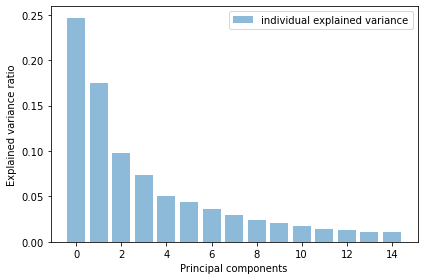

Logistic Regression From PCA
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        53
           1       1.00      0.98      0.99        50
           2       0.94      1.00      0.97        44
           3       1.00      1.00      1.00        42
           4       1.00      0.98      0.99        47
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        28
           7       0.98      1.00      0.99        46

    accuracy                           0.99       357
   macro avg       0.99      0.99      0.99       357
weighted avg       0.99      0.99      0.99       357

Prediction Vector: 
 [2 5 3 0 4 0 0 1 0 3 6 1 3 5 5 3 6 4 1 0 4 1 5 3 3 0 6 2 5 2 1 5 7 0 4 0 5
 0 2 7 1 4 5 0 1 1 5 2 0 5 1 7 3 2 1 4 6 3 2 6 3 7 0 1 3 7 1 1 6 0 2 0 6 0
 0 0 0 4 2 5 1 4 0 7 2 0 1 6 1 1 1 1 5 4 2 3 4 6 0 0 1 1 4 3 7 4 2 0 5 7 5
 3 7 7 1 3 2 3 7 5 1 7 7 0 1 5 3 1 6 4 3 5 6 4 1 5 

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




 Accuracy: 
 99.43977591036415

 Confusion Matrix: 
 [[53  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0]
 [ 0  0  0 42  0  0  0  0]
 [ 2  0  0  0 45  0  0  0]
 [ 0  0  0  0  0 47  0  0]
 [ 0  0  0  0  0  0 28  0]
 [ 0  0  0  0  0  0  0 46]]
RM From PCA
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.94      1.00      0.97        50
           2       0.98      0.98      0.98        44
           3       1.00      1.00      1.00        42
           4       0.98      0.98      0.98        47
           5       1.00      1.00      1.00        47
           6       1.00      0.93      0.96        28
           7       1.00      1.00      1.00        46

    accuracy                           0.99       357
   macro avg       0.99      0.98      0.99       357
weighted avg       0.99      0.99      0.99       357

Prediction Vector: 
 [2 5 3 0 4 0 0 1 0 3 

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        53
           1       0.84      0.94      0.89        50
           2       0.93      0.89      0.91        44
           3       0.93      0.95      0.94        42
           4       0.94      0.94      0.94        47
           5       0.94      0.96      0.95        47
           6       0.92      0.82      0.87        28
           7       0.98      0.96      0.97        46

    accuracy                           0.92       357
   macro avg       0.93      0.92      0.92       357
weighted avg       0.93      0.92      0.92       357

Prediction Vector: 
 [2 5 3 0 4 0 0 3 0 3 4 1 3 5 5 3 6 4 1 0 4 1 5 3 3 0 6 2 5 2 1 5 7 0 4 0 5
 0 2 7 1 0 5 0 1 1 5 2 2 5 1 7 3 2 1 4 6 3 2 6 3 1 0 1 3 7 1 1 6 0 2 0 6 0
 0 0 0 4 2 5 1 4 0 7 4 0 1 4 1 1 1 1 5 4 2 3 4 5 0 0 1 1 4 3 7 4 2 0 5 7 5
 3 7 7 1 3 2 3 7 1 1 7 7 0 1 5 3 1 6 4 3 5 6 4 1 5 5 4 2 7 1 4 7 5 2 1 4 6
 2 4 

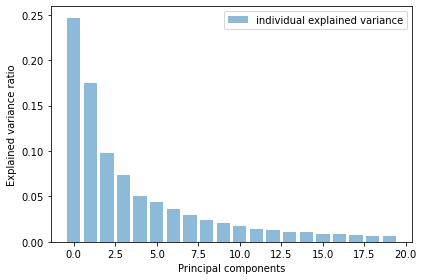

Logistic Regression From PCA
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        42
           4       0.98      1.00      0.99        47
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        46

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357

Prediction Vector: 
 [2 5 3 0 4 0 0 1 0 3 6 1 3 5 5 3 6 4 1 0 4 1 5 3 3 0 6 2 5 2 1 5 7 0 4 0 5
 0 2 7 1 4 5 0 1 1 5 2 0 5 1 7 3 2 1 4 6 3 2 6 3 4 0 1 3 7 1 1 6 0 2 0 6 0
 0 0 0 4 2 5 1 4 0 7 4 0 1 6 1 1 1 1 5 4 2 3 4 6 0 0 1 1 4 3 7 4 2 0 5 7 5
 3 7 7 1 3 2 3 7 5 1 7 7 0 1 5 3 1 6 4 3 5 6 4 1 5 

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        46

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357

Prediction Vector: 
 [2 5 3 0 4 0 0 1 0 3 6 1 3 5 5 3 6 4 1 0 4 1 5 3 3 0 6 2 5 2 1 5 7 0 4 0 5
 0 2 7 1 4 5 0 1 1 5 2 0 5 1 7 3 2 1 4 6 3 2 6 3 0 0 1 3 7 1 1 6 0 2 0 6 0
 0 0 0 4 2 5 1 4 0 7 4 0 1 6 1 1 1 1 5 4 2 3 4 6 0 0 1 1 4 3 7 4 2 0 5 7 5
 3 7 7 1 3 2 3 7 5 1 7 7 0 1 5 3 1 6 4 3 5 6 4 1 5 5 4 2 7 1 4 7 5 2 2 4 6
 2 4 

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        53
           1       0.81      0.96      0.88        50
           2       0.90      0.86      0.88        44
           3       0.93      0.95      0.94        42
           4       0.90      0.91      0.91        47
           5       0.98      0.94      0.96        47
           6       1.00      0.71      0.83        28
           7       0.88      0.93      0.91        46

    accuracy                           0.91       357
   macro avg       0.92      0.90      0.90       357
weighted avg       0.91      0.91      0.91       357

Prediction Vector: 
 [2 5 3 0 4 0 0 3 0 3 4 1 3 5 5 3 6 4 1 0 4 1 5 3 3 0 6 2 5 2 1 5 7 0 4 0 5
 0 2 7 1 0 5 0 1 1 5 2 2 5 1 7 3 2 1 4 6 3 2 6 3 1 0 1 3 7 1 1 7 0 2 0 6 0
 0 0 0 4 2 5 1 4 0 7 4 0 1 4 1 1 1 1 5 4 2 3 4 5 0 0 1 1 4 3 7 4 2 0 5 7 5
 3 7 7 1 3 2 3 7 1 1 7 7 0 1 5 3 1 6 4 3 5 6 4 1 5 5 4 2 7 1 4 7 5 2 1 4 6
 2 4 

In [31]:
from sklearn.decomposition import PCA
def select_features(X_train, X_test,n):
    global pca
    # configure to select a subset of features
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    pca = PCA(n_components = n)
    X_train_fs = pca.fit_transform(X_train)
    X_test_fs = pca.transform(X_test)
    return X_train_fs, X_test_fs
 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# feature selection
for n in range(5,25,5):
    X_train_fs, X_test_fs = select_features(X_train, X_test,n)
    
    print ("Explained Variance Ratio of ",n," Components:")
    explained_variance = pca.explained_variance_ratio_
    print(explained_variance)
    
    plt.figure(figsize=(6, 4))
    plt.bar(range(n), explained_variance, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
    # fit the model
    print ("Logistic Regression From PCA")
    LogReg(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    print ("SVM From PCA")
    SVM(X_train_fs, X_test_fs, y_train, y_test, svmtype="SVC", verbose=True, clf=None)
    print ("RM From PCA")
    RandomForest(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    print ("Xgboost From PCA")
    XgBoost(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    

# LDA

[4.96572524e-01 3.85744029e-01 1.17683447e-01 1.46914513e-30
 1.19366594e-30 6.31460065e-31 5.77735233e-31]


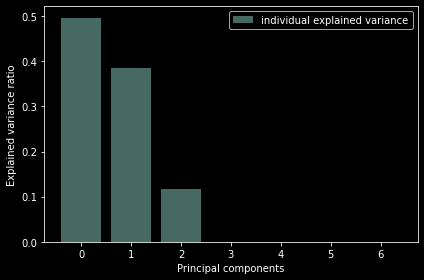

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
sc = StandardScaler()
y_train = y_train.to_numpy(dtype='int')
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
lda = LinearDiscriminantAnalysis()
X_train = lda.fit_transform(X_train,y_train)
X_test = lda.transform(X_test)
explained_variance = lda.explained_variance_ratio_
print(explained_variance)
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

Explained Variance Ratio
[0.24687673 0.17522353 0.09728942 0.07379666 0.05075452 0.04395209
 0.03642079 0.02999141 0.02366637 0.02055695 0.01702147 0.01399789
 0.01255882 0.01063917 0.0105776  0.00911705 0.00895912 0.00793295
 0.00630083 0.00605789]


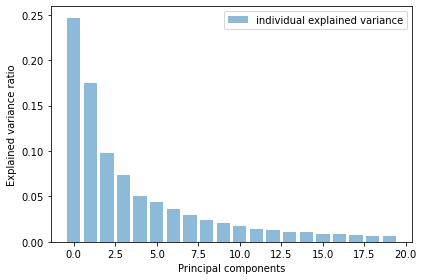

Logistic Regression From LDA
Classification Report:
              precision    recall  f1-score   support

           0       0.15      1.00      0.26        53
           1       0.00      0.00      0.00        50
           2       0.00      0.00      0.00        44
           3       0.00      0.00      0.00        42
           4       0.00      0.00      0.00        47
           5       0.00      0.00      0.00        47
           6       0.00      0.00      0.00        28
           7       0.00      0.00      0.00        46

    accuracy                           0.15       357
   macro avg       0.02      0.12      0.03       357
weighted avg       0.02      0.15      0.04       357

Prediction Vector: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted s

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        46

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357

Prediction Vector: 
 [2 5 3 0 4 0 0 1 0 3 6 1 3 5 5 3 6 4 1 0 4 1 5 3 3 0 6 2 5 2 1 5 7 0 4 0 5
 0 2 7 1 4 5 0 1 1 5 2 0 5 1 7 3 2 1 4 6 3 2 6 3 0 0 1 3 7 1 1 6 0 2 0 6 0
 0 0 0 4 2 5 1 4 0 7 4 0 1 6 1 1 1 1 5 4 2 3 4 6 0 0 1 1 4 3 7 4 2 0 5 7 5
 3 7 7 1 3 2 3 7 5 1 7 7 0 1 5 3 1 6 4 3 5 6 4 1 5 5 4 2 7 1 4 7 5 2 2 4 6
 2 4 

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        46

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357

Prediction Vector: 
 [2 5 3 0 4 0 0 1 0 3 6 1 3 5 5 3 6 4 1 0 4 1 5 3 3 0 6 2 5 2 1 5 7 0 4 0 5
 0 2 7 1 4 5 0 1 1 5 2 0 5 1 7 3 2 1 4 6 3 2 6 3 0 0 1 3 7 1 1 6 0 2 0 6 0
 0 0 0 4 2 5 1 4 0 7 4 0 1 6 1 1 1 1 5 4 2 3 4 6 0 0 1 1 4 3 7 4 2 0 5 7 5
 3 7 7 1 3 2 3 7 5 1 7 7 0 1 5 3 1 6 4 3 5 6 4 1 5 5 4 2 7 1 4 7 5 2 2 4 6
 2 4 

{'accuracy': 100.0,
 'model_obj': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
               gamma=0, gpu_id=-1, importance_type=None,
               interaction_constraints='', learning_rate=0.01, max_delta_step=0,
               max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=4,
               num_parallel_tree=1, objective='multi:softprob', predictor='auto',
               random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
               subsample=1, tree_method='exact', validate_parameters=1,
               verbosity=None)}

In [34]:
def select_features(X_train, X_test,y_train):
    global lda
    # configure to select a subset of features
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    y_train = y_train.to_numpy(dtype='int')
    lda = LinearDiscriminantAnalysis(solver='svd')
    X_train_fs = lda.fit_transform(X_train,y_train)
    X_test_fs = lda.transform(X_test)
    return X_train_fs, X_test_fs
 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# feature selection

X_train_fs, X_test_fs  = select_features(X_train, X_test,y_train)
    
print ("Explained Variance Ratio")
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
plt.figure(figsize=(6, 4))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center',label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
    
    # fit the model
print ("Logistic Regression From LDA")
LogReg(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
print ("SVM From LDA")
SVM(X_train_fs, X_test_fs, y_train, y_test, svmtype="SVC", verbose=True, clf=None)
print ("RM From LDA")
RandomForest(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
print ("Xgboost From LDA")
XgBoost(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    

# TSNE

In [35]:
from sklearn.manifold import TSNE
def select_features(X_train, X_test,n):
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    tsne = TSNE(n_components = n)
    X_train_fs = tsne.fit_transform(X_train)
    X_test_fs = tsne.fit_transform(X_test)
    return X_train_fs, X_test_fs
 
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# feature selection
for n in range(1,4):
    X_train_fs, X_test_fs  = select_features(X_train, X_test,n)
    # fit the model
    print ("Logistic Regression From TSNE")
    LogReg(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    print ("SVM From TSNE")
    SVM(X_train_fs, X_test_fs, y_train, y_test, svmtype="SVC", verbose=True, clf=None)
    print ("RM From TSNE")
    RandomForest(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)
    print ("Xgboost From TSNE")
    XgBoost(X_train_fs, X_test_fs, y_train, y_test, verbose=True, clf=None)


C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Logistic Regression From TSNE
Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.74      0.39        53
           1       0.00      0.00      0.00        50
           2       0.00      0.00      0.00        44
           3       0.00      0.00      0.00        42
           4       0.00      0.00      0.00        47
           5       0.47      0.53      0.50        47
           6       0.00      0.00      0.00        28
           7       0.33      1.00      0.50        46

    accuracy                           0.31       357
   macro avg       0.13      0.28      0.17       357
weighted avg       0.14      0.31      0.19       357

Prediction Vector: 
 [0 7 5 0 0 0 0 5 0 5 0 3 5 5 5 5 0 0 5 0 0 7 7 7 7 0 0 0 5 0 7 5 7 0 0 7 7
 0 0 7 5 0 5 0 7 5 5 0 0 7 7 7 7 0 7 0 0 5 0 0 7 0 7 7 7 7 7 7 0 3 0 0 0 0
 0 0 0 0 0 7 7 0 0 7 0 0 7 0 5 7 7 7 7 0 0 7 0 7 0 7 7 7 0 7 7 0 0 0 7 7 5
 5 7 7 3 7 0 7 7 7 5 7 7 0 7 2 7 5 0 0 7 5 7 0 7 7

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with n

Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.51      0.31        53
           1       0.00      0.00      0.00        50
           2       0.00      0.00      0.00        44
           3       0.00      0.00      0.00        42
           4       0.00      0.00      0.00        47
           5       0.40      0.53      0.46        47
           6       0.00      0.00      0.00        28
           7       0.31      1.00      0.47        46

    accuracy                           0.27       357
   macro avg       0.12      0.26      0.15       357
weighted avg       0.13      0.27      0.17       357

Prediction Vector: 
 [0 7 5 0 0 7 4 5 0 5 0 5 5 5 5 5 0 0 5 4 0 7 7 7 7 0 0 0 5 0 7 5 7 0 7 7 7
 7 7 7 5 0 5 4 7 5 5 0 0 7 7 7 7 0 7 0 7 5 4 0 7 0 7 7 7 7 7 7 0 3 7 0 0 4
 0 4 0 0 0 7 7 0 0 7 0 0 7 0 5 7 7 7 7 0 0 7 0 7 7 7 7 7 0 7 7 7 7 0 7 7 5
 5 7 7 5 7 0 5 7 7 5 7 7 7 7 4 5 5 0 0 5 5 7 7 7 7 5 0 7 7 7 0 7 7 3 0 0 7
 7 0 

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.19      0.15        53
           1       0.00      0.00      0.00        50
           2       0.33      0.34      0.34        44
           3       0.18      0.07      0.10        42
           4       0.00      0.00      0.00        47
           5       0.45      0.55      0.50        47
           6       0.10      0.07      0.08        28
           7       0.43      0.98      0.60        46

    accuracy                           0.28       357
   macro avg       0.20      0.28      0.22       357
weighted avg       0.20      0.28      0.22       357

Prediction Vector: 
 [0 0 5 2 0 6 4 5 0 5 4 3 5 5 5 5 0 0 3 4 0 7 0 0 0 2 4 2 5 2 7 5 7 2 0 7 7
 6 6 7 5 2 5 4 7 5 5 2 2 0 7 7 0 4 7 2 6 5 0 0 0 0 7 7 7 7 7 7 4 3 6 2 0 4
 2 4 2 2 2 5 7 0 2 7 2 2 3 4 5 7 7 3 7 0 0 7 2 7 6 7 3 7 0 7 7 0 6 0 0 7 5
 5 7 7 3 0 2 5 7 0 3 7 7 6 7 0 5 5 0 0 5 5 7 0 7 0 5 0 6 7 7 0 0 7 1 4 0 7
 6 0 

C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Logistic Regression From TSNE
Classification Report:
              precision    recall  f1-score   support

           0       0.13      0.19      0.16        53
           1       0.00      0.00      0.00        50
           2       0.15      0.09      0.11        44
           3       0.24      0.48      0.32        42
           4       0.19      0.17      0.18        47
           5       0.00      0.00      0.00        47
           6       0.00      0.00      0.00        28
           7       0.26      0.59      0.36        46

    accuracy                           0.19       357
   macro avg       0.12      0.19      0.14       357
weighted avg       0.13      0.19      0.15       357

Prediction Vector: 
 [7 7 3 4 0 0 7 7 0 3 4 5 3 3 3 3 0 2 3 7 7 5 7 7 7 4 2 0 3 0 5 3 0 4 0 7 7
 0 0 0 3 4 3 7 7 3 3 0 2 7 7 7 7 7 3 0 0 1 4 0 7 7 7 3 3 7 3 3 4 7 0 4 0 7
 4 7 0 4 0 3 3 0 0 0 4 4 7 4 3 7 7 7 7 0 4 3 4 7 0 7 3 7 0 3 7 0 0 2 7 7 3
 1 7 7 3 0 2 1 3 7 5 7 7 0 3 1 3 3 0 7 3 1 7 0 5 7

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with n

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.28      0.46      0.35        50
           2       0.07      0.02      0.03        44
           3       0.09      0.02      0.04        42
           4       0.26      0.53      0.34        47
           5       0.00      0.00      0.00        47
           6       0.00      0.00      0.00        28
           7       0.19      0.43      0.26        46

    accuracy                           0.20       357
   macro avg       0.11      0.18      0.13       357
weighted avg       0.12      0.20      0.14       357

Prediction Vector: 
 [7 7 1 4 2 6 4 7 4 1 7 1 1 1 1 1 0 4 1 4 7 3 7 7 7 4 4 4 1 4 3 1 0 4 0 4 7
 6 0 0 1 4 1 4 7 1 1 4 4 7 7 0 7 7 1 2 2 1 4 0 7 7 7 1 7 7 1 7 4 7 6 4 0 4
 4 4 4 4 4 1 1 4 4 0 4 4 7 7 1 7 7 7 7 4 4 1 4 7 6 7 3 7 4 1 7 0 0 4 7 0 1
 1 0 7 1 0 4 1 3 7 3 7 7 6 1 1 1 1 2 7 1 1 7 0 3 7 1 4 0 7 7 4 0 7 4 7 4 7
 0 4 

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.09      0.11        53
           1       0.21      0.26      0.23        50
           2       0.27      0.16      0.20        44
           3       0.27      0.26      0.27        42
           4       0.21      0.15      0.17        47
           5       0.33      0.06      0.11        47
           6       0.18      0.32      0.23        28
           7       0.26      0.54      0.35        46

    accuracy                           0.22       357
   macro avg       0.23      0.23      0.21       357
weighted avg       0.23      0.22      0.20       357

Prediction Vector: 
 [7 7 1 4 2 6 4 7 6 1 4 1 1 1 1 1 0 0 1 4 7 3 7 7 7 6 6 6 1 6 3 1 0 6 6 7 7
 6 6 0 1 6 1 4 7 1 1 6 4 7 7 7 7 7 3 2 2 1 2 0 7 7 7 3 3 7 3 3 6 7 6 4 0 4
 2 4 6 2 6 5 3 0 6 0 2 2 7 4 5 7 7 7 3 0 0 3 2 7 6 7 3 7 6 3 7 6 6 4 7 0 1
 1 7 7 1 7 0 1 3 7 1 7 7 6 3 3 1 1 2 7 1 1 7 6 3 3 1 0 6 7 7 4 7 3 2 7 4 7
 6 0 

C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Logistic Regression From TSNE
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.64      0.18      0.28        50
           2       0.00      0.00      0.00        44
           3       0.09      0.29      0.14        42
           4       0.28      0.19      0.23        47
           5       0.05      0.02      0.03        47
           6       0.07      0.29      0.11        28
           7       0.17      0.07      0.09        46

    accuracy                           0.12       357
   macro avg       0.16      0.13      0.11       357
weighted avg       0.17      0.12      0.11       357

Prediction Vector: 
 [6 3 6 6 3 4 6 0 4 6 6 0 6 6 6 6 3 3 3 7 6 3 6 3 3 5 3 3 6 6 0 6 3 4 3 3 3
 4 3 7 6 4 6 6 3 6 7 4 4 3 3 6 3 3 5 3 3 6 6 3 0 6 3 5 4 3 5 3 3 3 3 3 3 7
 4 6 6 7 3 1 1 4 3 3 7 6 3 6 1 3 6 6 3 3 3 3 7 6 2 5 7 3 6 3 6 6 4 6 3 3 6
 1 3 3 0 3 4 0 7 3 1 3 6 3 6 6 3 6 3 6 0 6 6 3 1 1

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with n

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.00      0.00      0.00        50
           2       0.13      1.00      0.22        44
           3       0.00      0.00      0.00        42
           4       0.00      0.00      0.00        47
           5       0.00      0.00      0.00        47
           6       0.00      0.00      0.00        28
           7       0.00      0.00      0.00        46

    accuracy                           0.12       357
   macro avg       0.02      0.12      0.03       357
weighted avg       0.02      0.12      0.03       357

Prediction Vector: 
 [2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 2 2 2 2 6 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 

C:\Users\Hp\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.03      0.06      0.04        53
           1       0.00      0.00      0.00        50
           2       0.26      0.25      0.26        44
           3       0.02      0.05      0.03        42
           4       0.03      0.02      0.02        47
           5       0.00      0.00      0.00        47
           6       0.13      0.21      0.16        28
           7       0.24      0.20      0.21        46

    accuracy                           0.09       357
   macro avg       0.09      0.10      0.09       357
weighted avg       0.08      0.09      0.08       357

Prediction Vector: 
 [6 3 2 2 3 4 2 0 2 0 2 0 0 0 0 0 3 0 3 7 2 0 6 0 5 5 3 3 0 2 0 0 4 5 3 1 0
 4 3 3 0 2 2 7 3 0 2 5 4 7 3 6 0 1 0 3 3 0 2 3 4 6 3 0 2 0 0 0 3 3 3 7 3 7
 2 7 6 2 3 0 0 5 1 4 5 2 3 2 0 3 6 7 3 3 5 0 2 6 4 7 7 3 2 4 6 6 4 6 7 4 6
 0 0 3 0 3 3 0 7 3 0 3 6 4 0 7 0 0 3 2 0 0 6 3 0 7 2 3 6 0 3 3 3 4 3 6 3 6
 3 6 